## Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, GlobalAveragePooling1D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

## Dataset

In [ ]:
!pip install kaggle
try:
    ! mkdir ~/.kaggle
except:
    pass
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download zhaoyj688/vegfru

In [43]:
import shutil
import os

supported_fruits_path="./fruits.txt"
supported_veggies_path="./veggies.txt"

fruits_supported_list=[]
veggies_supported_list=[]

def initialise_directories(directory_path,supported_food_list):
    with open(directory_path, 'r') as f:
        for line in f:
            supported_food_list.append(line.strip())

initialise_directories(supported_fruits_path, fruits_supported_list)
initialise_directories(supported_veggies_path, veggies_supported_list)

        
print(fruits_supported_list)
print(veggies_supported_list)


fruits_path='./fru92_images'
veggies_path='./veg200_images'


def filter_unsupported_food(directory_path, supported_food_list):
    for filename in os.listdir(directory_path):
        full_path = os.path.join(directory_path, filename)
        if filename not in supported_food_list:
             shutil.rmtree(full_path)
            
filter_unsupported_food(fruits_path, fruits_supported_list)
filter_unsupported_food(veggies_path, veggies_supported_list)




['apple', 'banana', 'grape', 'green_apple', 'grape_white', 'juicy_peach', 'kiwi_fruit', 'lemon', 'mango', 'pineapple', 'red_grape']
['carrot', 'corn', 'cucumber', 'onion', 'potato', 'strawberry', 'tomato', 'watermelon']


In [44]:
# Split fruits & veggies into training & testing

from sklearn.model_selection import train_test_split
import os
import shutil

src_dir = './fru92_images'

output_dir = './dataset'

test_size = 0.25

for class_name in os.listdir(src_dir):
    class_dir = os.path.join(src_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    train_files, test_files = train_test_split(image_files, test_size=test_size)

    train_class_dir = os.path.join(output_dir, 'train', class_name)
    test_class_dir = os.path.join(output_dir, 'test', class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    for f in train_files:
        shutil.copy(f, os.path.join(train_class_dir, os.path.basename(f)))

    for f in test_files:
        shutil.copy(f, os.path.join(test_class_dir, os.path.basename(f)))


In [ ]:
fruits_veggies_train_path='./dataset/train'
fruits_veggies_test_path='./dataset/test'


def count_images(folder_path):
    count_all_images=0
    for class_name in os.listdir(folder_path):
        class_path=os.path.join(folder_path,class_name)
        count_all_images+=len(os.listdir(class_path))
    return count_all_images


print(f"Total classes: {len(os.listdir(fruits_veggies_train_path))}")
print(f"Training Set: {count_images(fruits_veggies_train_path)}")
print(f"Test Set: {count_images(fruits_veggies_test_path)}")

In [ ]:
# Downloading and extracting the dataset

!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar xzvf food-101.tar.gz
try:
    os.remove('./food-101.tar.gz')
except:
    pass


In [61]:

dataset_path="./food-101"
images_path=os.path.join(dataset_path,"images")
meta_path=os.path.join(dataset_path,"meta")
    
dest_train_path=os.path.join(dataset_path,'train')
dest_test_path=os.path.join(dataset_path,'test')

In [ ]:
# Doing the splits based on train.txt and test.txt

import shutil

if os.path.exists(dest_train_path):
  shutil.rmtree(dest_train_path)
if os.path.exists(dest_test_path):
  shutil.rmtree(dest_test_path)

def split_train_test(src_path, dest_path):
  with open(src_path, 'r') as f:
    line = f.readline()
    while line:
        entry = line.split("/")
        line=f.readline()
        print(entry)
        dest_img_path=os.path.join(dest_path,entry[0])
        if not os.path.exists(dest_img_path): # make a folder for each of the classes if not present
          os.makedirs(dest_img_path)
        src_img_path=os.path.join(images_path,entry[0],entry[1][:-1]+'.jpg') # original image path
        shutil.copy(src_img_path,dest_img_path)

train_txt_path= os.path.join(meta_path,'train.txt')
test_txt_path= os.path.join(meta_path,'test.txt')

# Split into training then testing
split_train_test(train_txt_path,dest_train_path)
split_train_test(test_txt_path,dest_test_path)




In [59]:
# Check food101 was split successfully

shutil.rmtree(images_path)
def count_images(folder_path):
    count_all_images=0
    count_all_classes=0
    for class_name in os.listdir(folder_path):
        class_path=os.path.join(folder_path,class_name)
        count_all_images+=len(os.listdir(class_path))
        count_all_classes+=1
    return count_all_classes, count_all_images

print(f"Training Set: {count_images(dest_train_path)}")
print(f"Test Set: {count_images(dest_test_path)}")


Training Set: (101, 75750)
Test Set: (101, 25250)


In [ ]:
# Merging both datasets

shutil.copytree(dest_train_path, fruits_veggies_train_path, dirs_exist_ok=True)
shutil.copytree(dest_test_path, fruits_veggies_test_path, dirs_exist_ok=True)


In [68]:
# Remove food101 dir

shutil.rmtree(dest_train_path)
shutil.rmtree(dest_test_path)

In [3]:

def count_images(folder_path):
    count_all_images=0
    count_all_classes=0
    for class_name in os.listdir(folder_path):
        class_path=os.path.join(folder_path,class_name)
        count_all_images+=len(os.listdir(class_path))
        count_all_classes+=1
    return count_all_classes, count_all_images

print(f"Training Set: {count_images(fruits_veggies_train_path)}")
print(f"Test Set: {count_images(fruits_veggies_test_path)}")

Training Set: (120, 89694)
Test Set: (120, 29910)


## Preprocessing

In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
)
test_datagen=ImageDataGenerator(
    rescale=1./255)

batch_size=32
IMG_SIZE=(224,224)

train_generator = train_datagen.flow_from_directory(
    fruits_veggies_train_path,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
)

num_training_samples=train_generator.n

print(f"Num of training samples {num_training_samples}")

val_generator = test_datagen.flow_from_directory(
    fruits_veggies_test_path,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
)

num_validation_samples=val_generator.n

print(f"Num of Validation samples {num_validation_samples}")


## Training

In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import VGG16, ResNet50, ResNet50V2, InceptionResNetV2, Xception
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import top_k_categorical_accuracy


# create the base pre-trained model
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

x = base_model.output
x= GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)

predictions = Dense(120, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', top_5_accuracy ])



def epoch_decay(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * drop ** (epoch // epochs_drop)
    return lr

lr_scheduler = LearningRateScheduler(epoch_decay)


early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=10,            
    restore_best_weights=True   
)

csv_logger=CSVLogger('training_inceptionresnet.log')


checkpoint_callback = ModelCheckpoint(filepath='./model_weights.{epoch:02d}.h5', 
                                       save_weights_only=True)


epochs=100

model_history = model.fit(train_generator,
                    steps_per_epoch = num_training_samples // batch_size,
                    validation_data=val_generator,
                    validation_steps=num_validation_samples // batch_size,
                    epochs=epochs,
                    verbose=2,
                    callbacks=[early_stopping, csv_logger, checkpoint_callback, lr_scheduler])

# model.save('model.h5')


83683744/83683744 [==============================] - 1s 0us/step


In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

## Interference 

In [9]:
class_list=['apple',
 'apple_pie',
 'baby_back_ribs',
 'baklava',
 'banana',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'corn',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cucumber',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'grape',
 'grape_white',
 'greek_salad',
 'green_apple',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'juicy_peach',
 'kiwi_fruit',
 'lasagna',
 'lemon',
 'lobster_bisque',
 'lobster_roll_sandwich',
 'macaroni_and_cheese',
 'macarons',
 'mango',
 'miso_soup',
 'mussels',
 'nachos',
 'omelette',
 'onion',
 'onion_rings',
 'oysters',
 'pad_thai',
 'paella',
 'pancakes',
 'panna_cotta',
 'peking_duck',
 'pho',
 'pineapple',
 'pizza',
 'pork_chop',
 'potato',
 'poutine',
 'prime_rib',
 'pulled_pork_sandwich',
 'ramen',
 'ravioli',
 'red_grape',
 'red_velvet_cake',
 'risotto',
 'samosa',
 'sashimi',
 'scallops',
 'seaweed_salad',
 'shrimp_and_grits',
 'spaghetti_bolognese',
 'spaghetti_carbonara',
 'spring_rolls',
 'steak',
 'strawberry',
 'strawberry_shortcake',
 'sushi',
 'tacos',
 'takoyaki',
 'tiramisu',
 'tomato',
 'tuna_tartare',
 'waffles',
 'watermelon']


In [6]:
def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [7]:
from tensorflow.keras.models import load_model


#Loading Xception
# model = load_model('xception_model.h5')
# model.load_weights('Xception_model_weights.07.h5')

#Loading ResNet
# model = load_model('resnet_model.h5')
# model.load_weights('ResNet_model_weights.35.h5')

#Loading InceptionResNetV2
model = load_model('inception_resnet_model.h5', custom_objects={'top_5_accuracy': top_5_accuracy})
model.load_weights('./InceptionResNet/InceptionResNet_model_weights.13.h5')

#Loading DenseNet201
# model = load_model('denset201_model.h5')
# model.load_weights('DenseNet201_model_weights.26.h5')

#Loading Inception
# model = load_model('inception_model.h5')
# model.load_weights('inception_model_weights.32.h5')

## Inference

In [29]:
import requests   
from PIL import Image
from io import BytesIO
import time
from keras.utils import img_to_array
import numpy as np

def predict (image_url, top_n=5):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    IMG_SIZE=(224,224)
    
    # Preprocess the image
    img = img.resize(IMG_SIZE)
    img_array = img_to_array(img)
    
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Make predictions
    predictions = model.predict(img_array)

    # Get top n labels
    top_n_indices = np.argsort(predictions)[0, -top_n:][::-1] # top n classes
    for idx in top_n_indices:
      print(predictions[0][idx])
    top_n_labels = [class_list[i] for i in top_n_indices]
    return top_n_labels


URL="https://www.ifyougiveablondeakitchen.com/wp-content/uploads/2022/05/baked-chocolate-donuts-open-graph-image.jpg"
print(predict(URL))


1/1 [==============================] - 0s 121ms/step
0.62184924
0.31816444
0.03260881
0.014129234
0.007903121
['chocolate_cake', 'chocolate_mousse', 'donuts', 'tiramisu', 'cup_cakes']


Evaluation

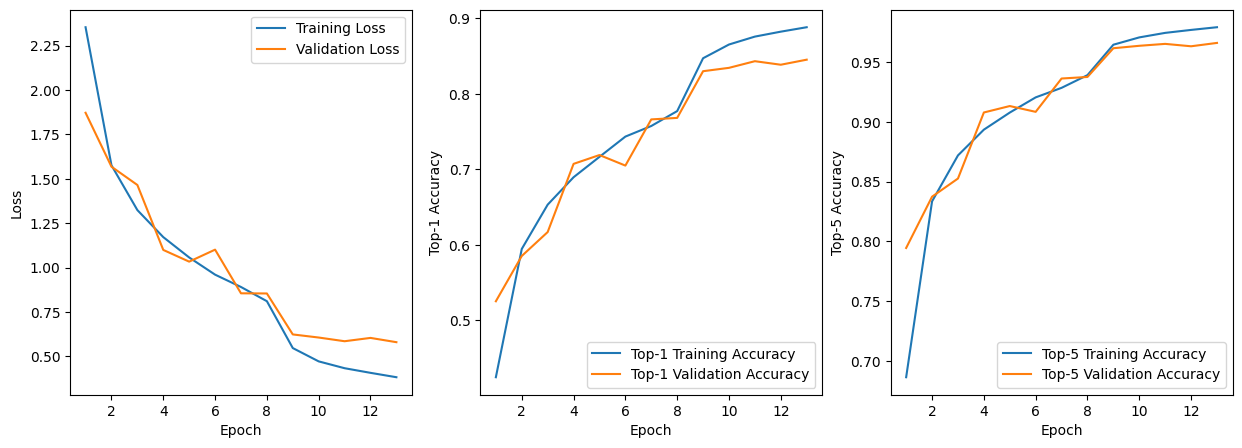

In [1]:
import matplotlib.pyplot as plt


logPath='./InceptionResNet/inception_resnet.log'
# read data from csv file
with open(logPath, 'r') as f:
    lines = f.readlines()[1:]  # skip header row

epochs = []
accuracy = []
loss = []
top5_accuracy = []
val_accuracy = []
val_loss = []
val_top5_accuracy = []

# parse data
for line in lines:
    parts = line.strip().split(',')
    epochs.append(int(parts[0])+1)
    accuracy.append(float(parts[1]))
    loss.append(float(parts[2]))
    top5_accuracy.append(float(parts[3]))
    val_accuracy.append(float(parts[4]))
    val_loss.append(float(parts[5]))
    val_top5_accuracy.append(float(parts[6]))


# plot training loss top-1 accuracy and top-5 accuracy side by side
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# plot training loss
axs[0].plot(epochs, loss, label='Training Loss')
axs[0].plot(epochs, val_loss, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(epochs, accuracy, label='Top-1 Training Accuracy')
axs[1].plot(epochs, val_accuracy, label='Top-1 Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Top-1 Accuracy')
axs[1].legend()

axs[2].plot(epochs, top5_accuracy, label='Top-5 Training Accuracy')
axs[2].plot(epochs, val_top5_accuracy, label='Top-5 Validation Accuracy')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Top-5 Accuracy')
axs[2].legend()

plt.show()
